In [23]:
from warnings import filterwarnings

filterwarnings("ignore")

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from random import seed

from sklearn.decomposition import PCA

plt.style.use("seaborn")

seed(0)

### Dimension reduction

In [25]:
cleaned_clust_data_stan=pd.read_csv("cleaned_and_coded_data.csv")

In [26]:
pca=PCA()
X_pca=pca.fit_transform(cleaned_clust_data_stan)

In [27]:
col=["F"+str(i) for i in range(1,X_pca.shape[1]+1)]
X_pca=pd.DataFrame(X_pca,columns=col,index=cleaned_clust_data_stan.index)

In [28]:
eigen_values=pca.explained_variance_ratio_
explained_variance=pd.Series(dict(zip(X_pca.columns,100.0*pca.explained_variance_ratio_)))

<AxesSubplot: title={'center': 'Inertia explained per factorial axes'}>

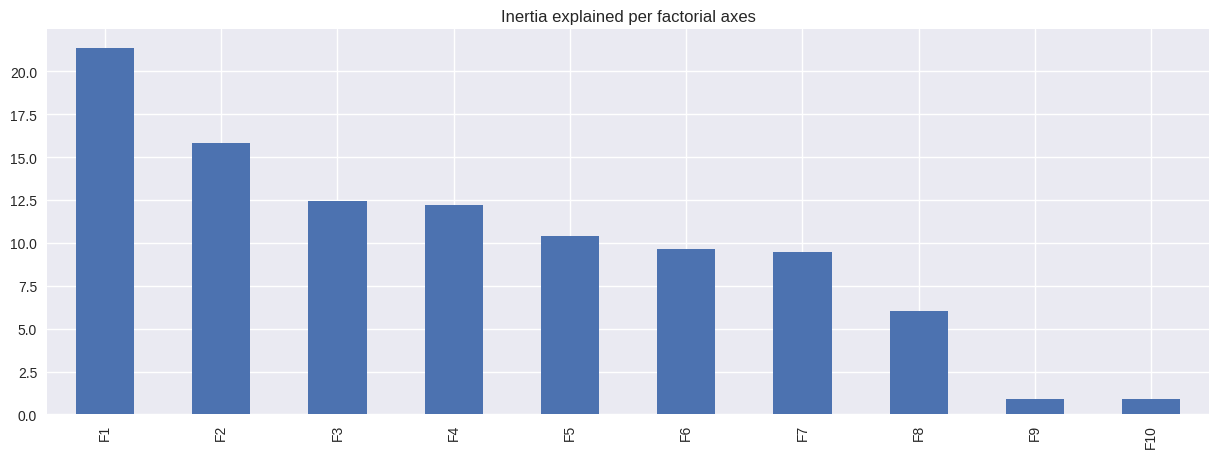

In [29]:
explained_variance.iloc[:10].plot(kind="bar",title="Inertia explained per factorial axes",figsize=(15,5))

In [30]:
explained_variance.iloc[:8].sum()

97.41120831165132

### Clustering

In [31]:
from sklearn.cluster import KMeans, BisectingKMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [32]:
X_pca.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41',
       'F42', 'F43', 'F44', 'F45', 'F46', 'F47'],
      dtype='object')

In [33]:
data_for_clust=X_pca.iloc[:,0:8]

In [34]:
data_for_clust.head()

,F1,F2,F3,F4,F5,F6,F7,F8
0,0.216039,-0.717713,-0.835903,-2.190296,-1.116010,0.622987,0.943403,0.525955
1,0.316437,-1.048475,-0.773484,-2.196503,-1.179724,0.531534,0.858202,0.554409
2,0.318068,-0.941777,-0.846785,-2.200153,-1.203957,0.559906,0.905004,0.377109
3,0.316437,-1.048475,-0.773484,-2.196503,-1.179724,0.531534,0.858202,0.554409
4,0.316437,-1.048475,-0.773484,-2.196503,-1.179724,0.531534,0.858202,0.554409


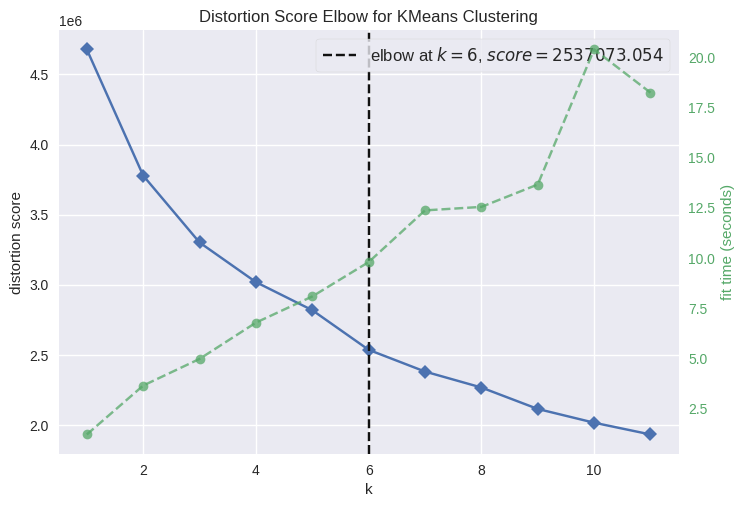

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data_for_clust)        # Fit the data to the visualizer
visualizer.show()  

In [36]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0)

labels=kmeans.fit_predict(data_for_clust)

In [38]:
from collections import Counter
Counter(labels)

Counter({2: 188194, 1: 171842, 0: 163957, 4: 21, 3: 2})

In [39]:
data_for_clust=X_pca.iloc[:,0:8]
data_for_clust["labels"]=labels

data_for_clust=data_for_clust[data_for_clust["labels"]!=3]
data_for_clust=data_for_clust[data_for_clust["labels"]!=4]

In [50]:
Counter(data_for_clust.iloc[:2000,:].labels)

Counter({2: 595, 1: 663, 0: 742})

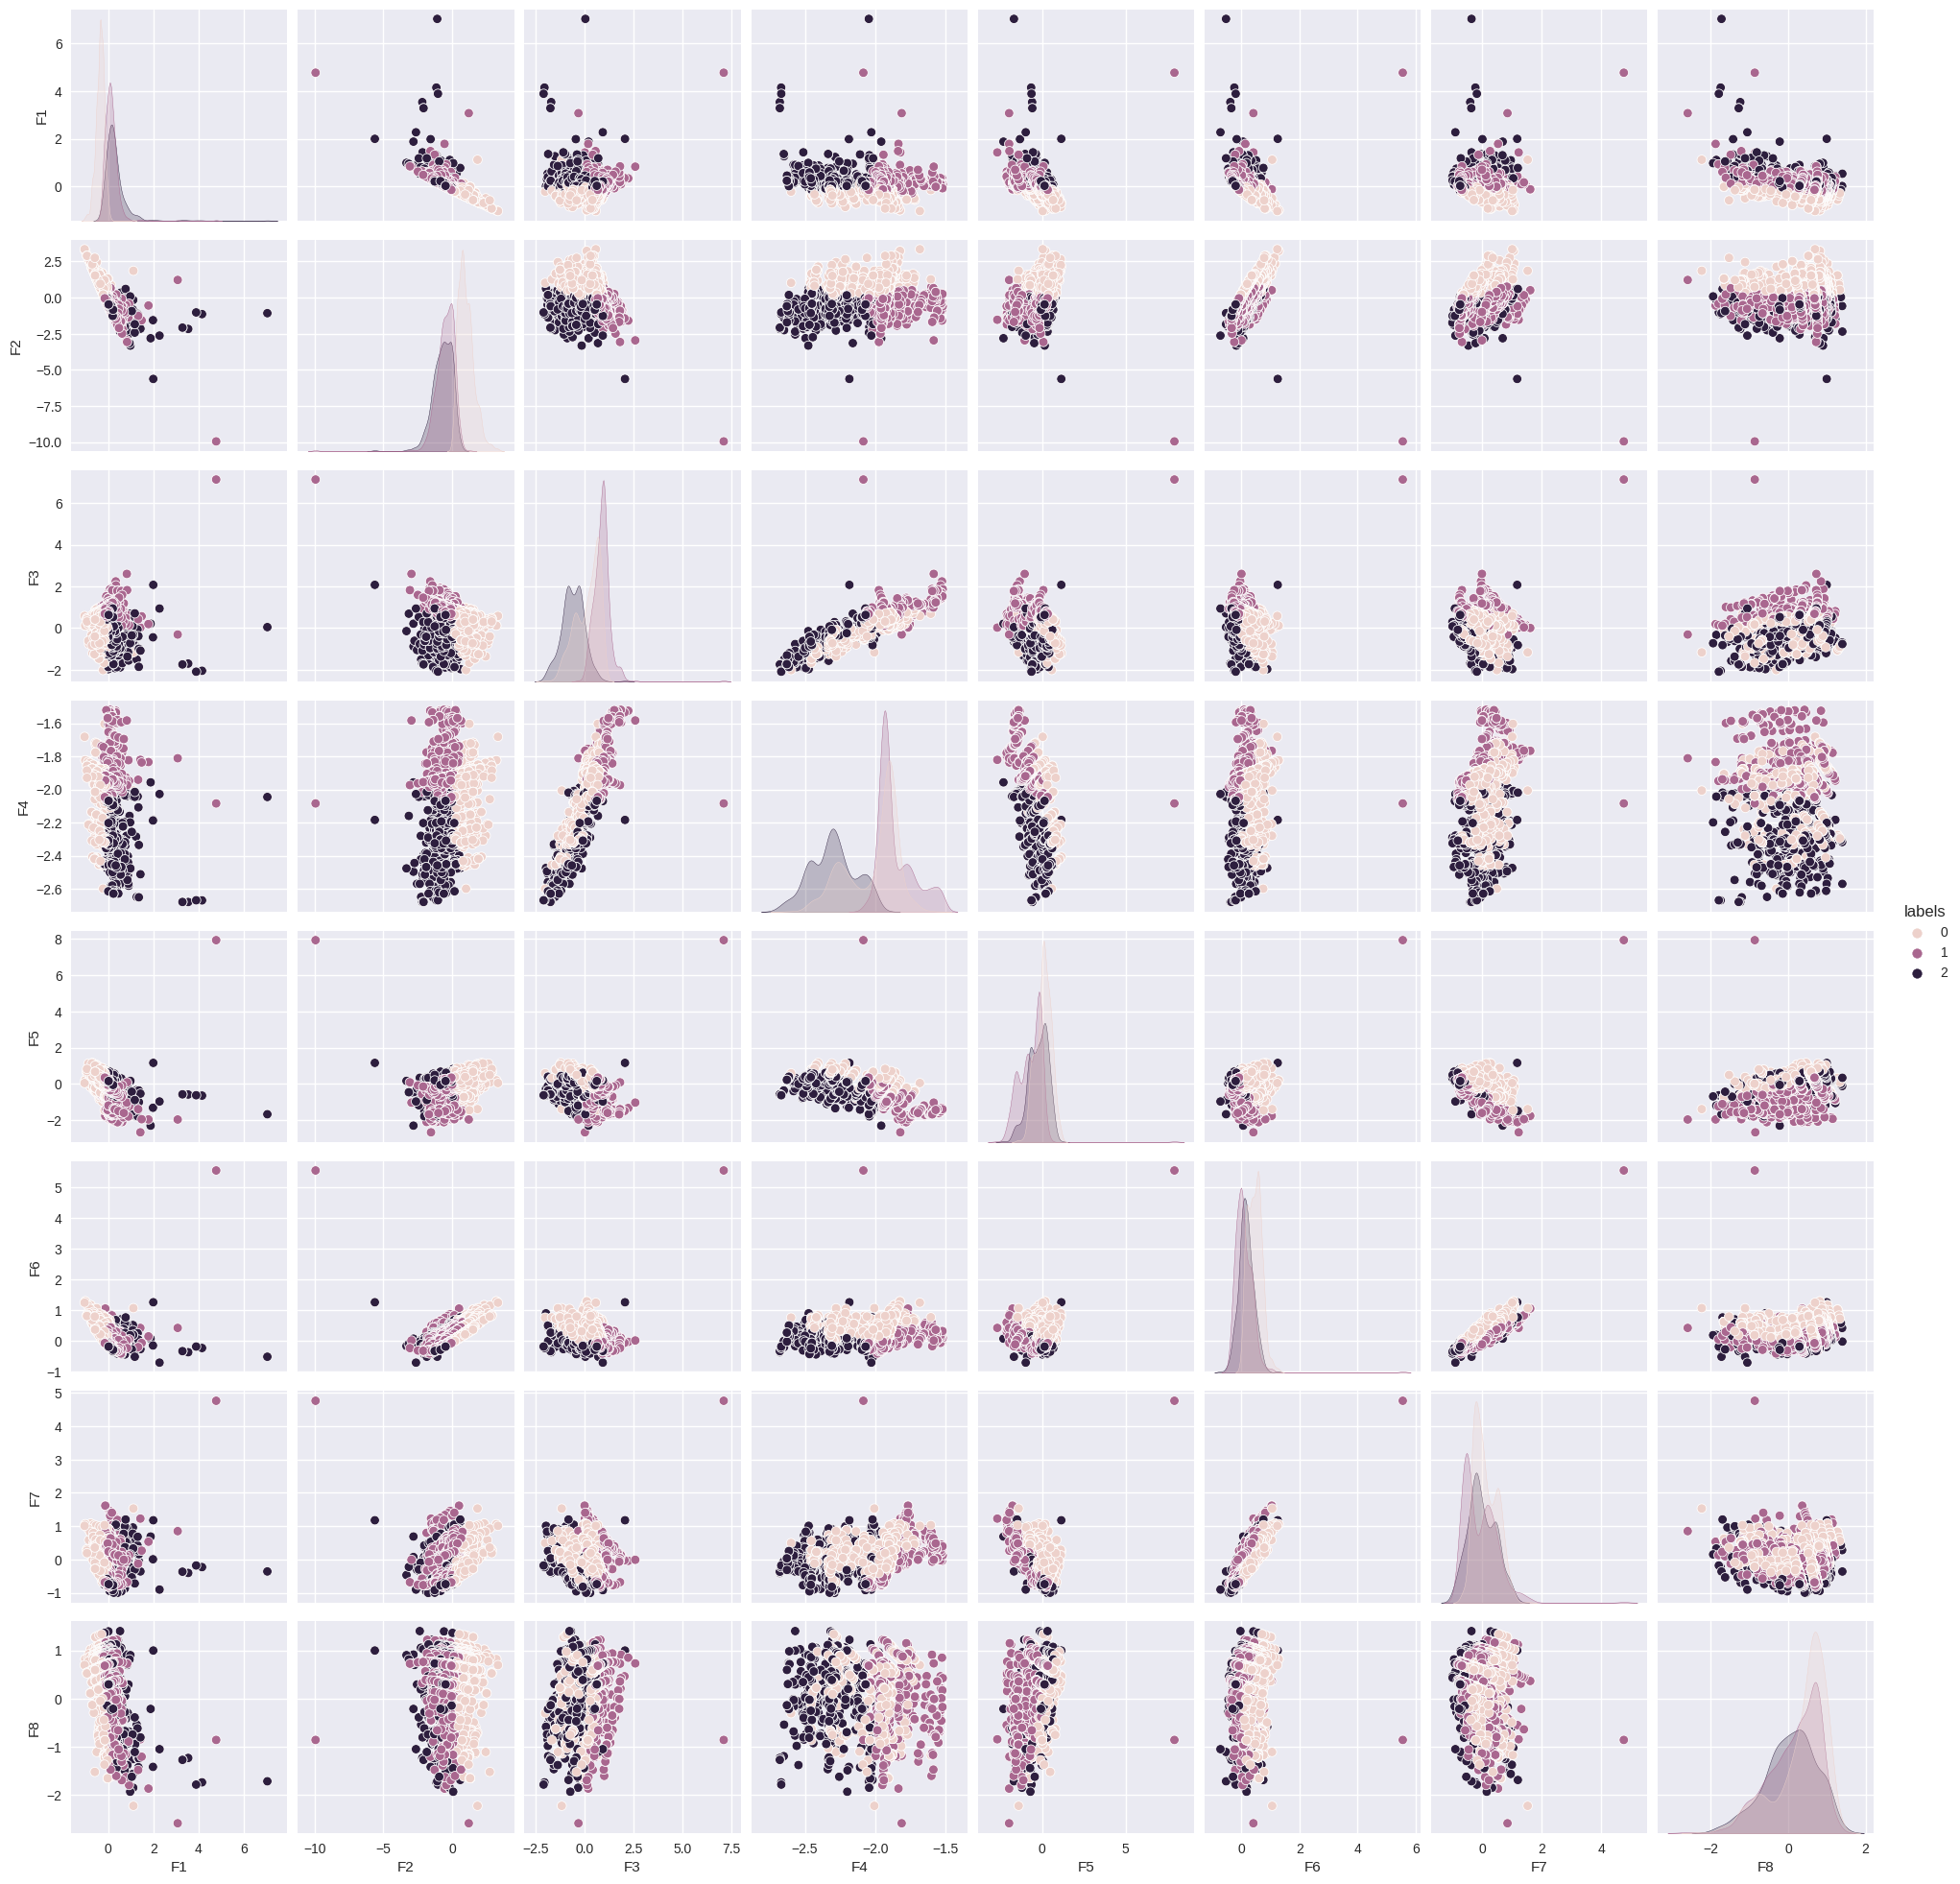

In [51]:
sns.pairplot(data_for_clust.iloc[:2000,:],hue="labels")

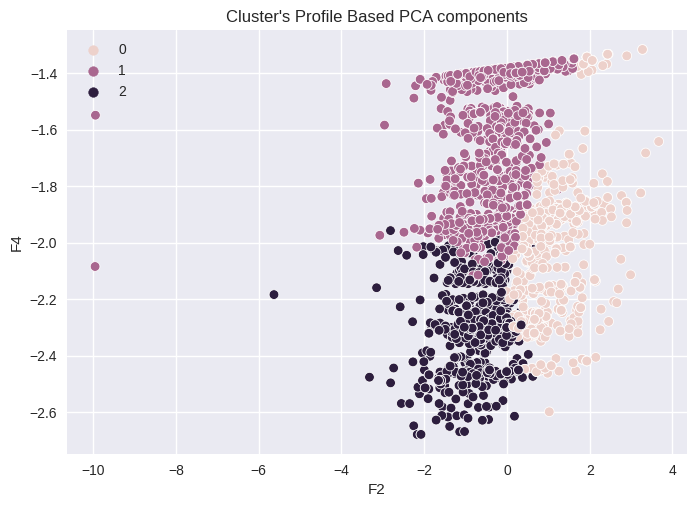

In [57]:
pl = sns.scatterplot(data = data_for_clust.iloc[:3000,:],x=data_for_clust.iloc[:3000,:]["F2"], y=data_for_clust.iloc[:3000,:]["F4"],hue=data_for_clust.iloc[:3000,:]["labels"])
pl.set_title("Cluster's Profile Based PCA components")
plt.legend()
plt.show()

In [109]:
X=data_for_clust
y_kmeans=data_for_clust["labels"]

In [110]:
from collections import Counter

Counter(y_kmeans)

Counter({2: 188194, 1: 171842, 0: 163957})

In [111]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,labels
0,0.216039,-0.717713,-0.835903,-2.190296,-1.116010,0.622987,0.943403,0.525955,2
1,0.316437,-1.048475,-0.773484,-2.196503,-1.179724,0.531534,0.858202,0.554409,2
2,0.318068,-0.941777,-0.846785,-2.200153,-1.203957,0.559906,0.905004,0.377109,2
3,0.316437,-1.048475,-0.773484,-2.196503,-1.179724,0.531534,0.858202,0.554409,2
4,0.316437,-1.048475,-0.773484,-2.196503,-1.179724,0.531534,0.858202,0.554409,2


In [113]:
Counter(data_for_clust.labels)

Counter({2: 188194, 1: 171842, 0: 163957})

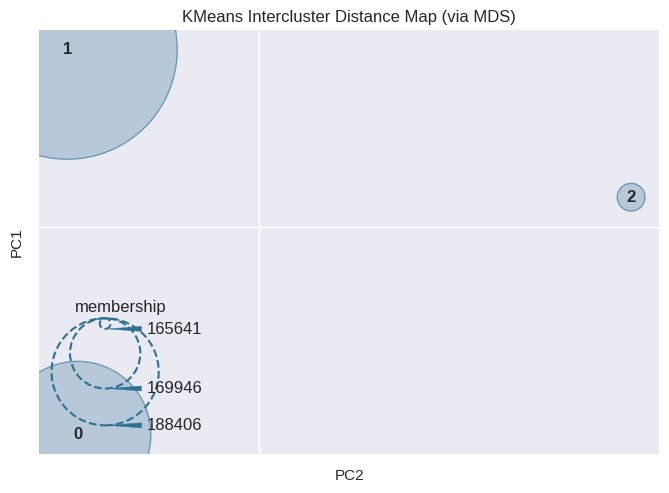

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [58]:
from sklearn.cluster import KMeans


from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(data_for_clust.drop(columns="labels"))        # Fit the data to the visualizer
visualizer.show() 

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_for_clust)        # Fit the data to the visualizer
visualizer.show() 